<a href="https://colab.research.google.com/github/rohith033/Indian---Rainfall--Analysis/blob/main/AutoEncoderDecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array 

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
HeatmapImages = glob.glob('./Images/*.png')
print(len(HeatmapImages))

121


In [ ]:
img = cv2.imread('./Images/indian_rainfall_1901.png')
img.shape

(389, 515, 3)

In [ ]:
# going to train on 150*150 image patch
all_images = []

for i in tqdm(HeatmapImages):
  img = keras.utils.load_img(i, target_size=(80,80,3))
  img = keras.utils.img_to_array(img)
  all_images.append(img)

100%|██████████| 121/121 [00:00<00:00, 192.91it/s]


In [ ]:
print(all_images[1])

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [ ]:
# lookup = cv2.imread(all_images[0])
cv2.imwrite("./dummy.png",all_images[2])

True

In [ ]:
all_images = np.array(all_images)

In [ ]:
print(all_images[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [ ]:
#split in train and validation 
train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [ ]:
def pixalate_image(image, scale_percent = 40):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  return low_res_image

In [ ]:
print(len(train_x))

108


In [ ]:
train_x = np.array(train_x)
val_x=np.array(val_x)

In [ ]:
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

In [ ]:
cv2.imwrite("./dummy.png",all_images[2])

True

In [ ]:
train_x = np.array(train_x)
val_x=np.array(val_x)

In [ ]:
Input_img = Input(shape=(80, 80, 3))  

#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 80, 80, 256)       7168      
                                                                 
 conv2d_38 (Conv2D)          (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2d_39 (Conv2D)          (None, 40, 40, 64)        73792     
                                                                 
 conv2d_40 (Conv2D)          (None, 40, 40, 64)        36928     
                                                           

In [ ]:
print(len(val_x_px))
len(train_x_px)
len(val_x)
len(val_x_px)
print(train_x[1].shape)
print(train_x_px[1].shape)
print(val_x[1].shape)
print(val_x_px[1].shape)


1
(80, 80, 3)


IndexError: ignored

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')
a_e = autoencoder.fit(train_x_px, train_x,
            epochs=10,
            batch_size=10,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper])

Epoch 1/10
11/11 [==============================] - 77s 7s/step - loss: 5566.1211 - val_loss: 3094.3450
Epoch 2/10
11/11 [==============================] - 76s 7s/step - loss: 2513.2876 - val_loss: 2018.0248
Epoch 3/10
11/11 [==============================] - 72s 7s/step - loss: 1723.1736 - val_loss: 1125.0939
Epoch 4/10
11/11 [==============================] - 70s 6s/step - loss: 883.6582 - val_loss: 753.8814
Epoch 5/10
11/11 [==============================] - 70s 6s/step - loss: 720.7844 - val_loss: 679.8311
Epoch 6/10
11/11 [==============================] - 70s 6s/step - loss: 641.5731 - val_loss: 582.9519
Epoch 7/10
11/11 [==============================] - 70s 6s/step - loss: 582.3054 - val_loss: 541.4843
Epoch 8/10
11/11 [==============================] - 70s 6s/step - loss: 527.7067 - val_loss: 496.7982
Epoch 9/10
11/11 [==============================] - 68s 6s/step - loss: 482.7208 - val_loss: 506.6475
Epoch 10/10
11/11 [==============================] - 70s 6s/step - loss: 483

In [ ]:
predictions = autoencoder.predict(val_x_px)

1/1 [==============================] - 2s 2s/step


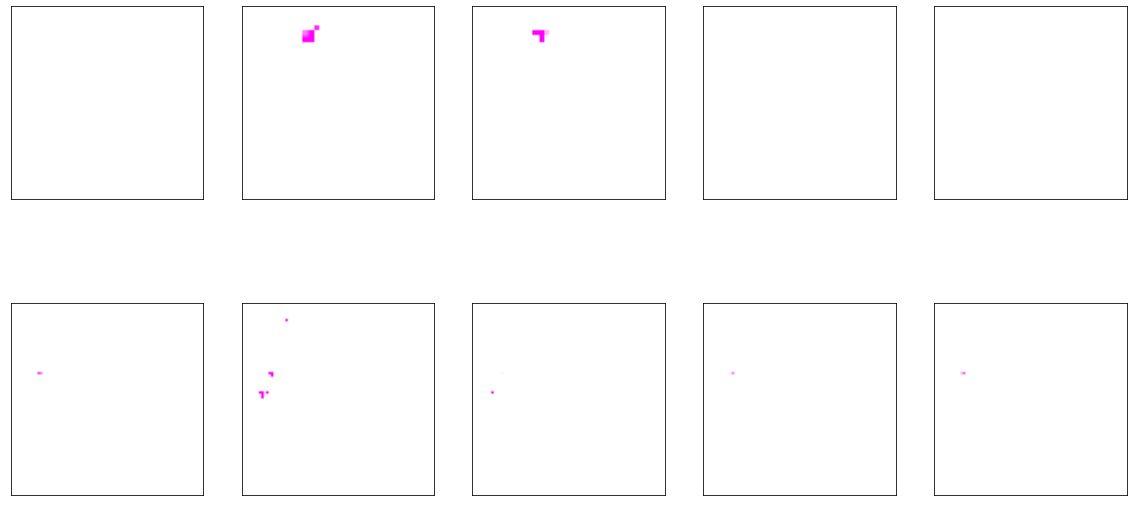

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x_px[i+2])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+2])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
print(val_x[8])

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
